<a href="https://colab.research.google.com/github/shandytp/people-analytics-bri/blob/main/Testing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import keras 
import tensorflow
import seaborn as sns
from scipy import stats
from sklearn import preprocessing as prep


In [44]:
%cd /content/drive/MyDrive/RESEARCH CENTER/RESEARCH_CONTEST/BRI_PEOPLE_ANALITYCS

/content/drive/MyDrive/RESEARCH CENTER/RESEARCH_CONTEST/BRI_PEOPLE_ANALITYCS


In [45]:
data_desc = pd.read_csv('Dataset/data_description.csv')
sample = pd.read_csv('Dataset/sample_submission.csv')
test = pd.read_csv('Dataset/test.csv')
train = pd.read_csv('Dataset/train.csv')

In [46]:
data_desc

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini
5,Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, ti..."
6,gender,Jenis Kelamin
7,age,Usia
8,marital_status_maried(Y/N),Status Pernikahan (Y / N)
9,number_of_dependences,Jumlah anak dalam tanggungan


In [47]:
sample

,index,Best Performance
0,0,0.131028
1,1,0.379354
2,2,0.031798
3,3,0.285220
4,4,0.848732
...,...,...
5995,5995,0.597299
5996,5996,0.072188
5997,5997,0.555975
5998,5998,0.933239


In [48]:
test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,level_3,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,level_4,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,level_4,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,level_4,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,level_4,3.34,2007,5,3,2,0,3,0,82.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,level_4,3.01,2015,2,2,2,0,4,0,58.60,0.0
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,level_4,3.56,2011,5,3,2,7,3,0,90.64,3.0
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,level_4,3.59,2013,3,2,3,0,16,0,13.02,0.0
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,level_4,2.93,2003,14,7,6,8,2,0,82.26,0.0


In [49]:
train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0


In [50]:
train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [51]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
job_duration_in_current_job_level,11153.0,1.433208,0.431086,0.00,1.224745,1.352775,1.414214,2.958040
job_duration_in_current_person_level,11153.0,1.349218,0.324660,0.00,1.224745,1.352775,1.385641,2.828427
job_duration_in_current_branch,11153.0,1.034646,0.416723,0.00,0.707107,1.118034,1.224745,2.677686
gender,11153.0,1.735587,0.441040,1.00,1.000000,2.000000,2.000000,2.000000
age,11153.0,1985.837084,4.632214,1963.00,1985.000000,1987.000000,1989.000000,1997.000000
number_of_dependences,11153.0,0.995517,0.881103,0.00,0.000000,1.000000,2.000000,7.000000
GPA,11153.0,3.176195,13.321687,0.00,2.820000,3.070000,3.270000,378.000000
year_graduated,11153.0,2009.174124,4.117162,1982.00,2008.000000,2010.000000,2012.000000,2019.000000
job_duration_from_training,11153.0,6.277952,5.033553,2.00,4.000000,5.000000,6.000000,36.000000
branch_rotation,11153.0,3.720165,2.399068,1.00,2.000000,3.000000,4.000000,22.000000


In [52]:
x = train.groupby(train.columns.tolist(),as_index=False).size()

In [53]:
x['size'].unique()

array([1])

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [55]:
df1 = train[train.isna().any(axis=1)]
df1

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,level_3,2.88,2012,5,4,5,0,1,15,NaN,NaN,0


In [56]:
train.fillna(0, inplace=True)
train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0


In [57]:
cat = list(train.select_dtypes(exclude=np.number).columns)
cat

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level']

In [58]:
for i in cat:
  print("Column :",i,"\nUnique :",train[i].unique())

Column : job_level 
Unique : ['JG04' 'JG05' 'JG03']
Column : person_level 
Unique : ['PG03' 'PG06' 'PG05' 'PG04' 'PG07' 'PG02' 'PG01' 'PG08']
Column : Employee_type 
Unique : ['RM_type_A' 'RM_type_C' 'RM_type_B']
Column : marital_status_maried(Y/N) 
Unique : ['Y' 'N']
Column : Education_level 
Unique : ['level_0' 'level_1' 'level_2' 'level_3' 'level_4' 'level_5']


In [59]:
cat2 = list(train.select_dtypes(include=np.number).columns)
cat2
for i in cat2:
  print("Column :",i,"\nUnique :",train[i].unique())

Column : job_duration_in_current_job_level 
Unique : [1.35277493 1.2922848  2.56515107 2.82842712 1.11803399 1.32287566
 1.08166538 1.38564065 2.73861279 1.22474487 1.15325626 1.25698051
 1.41421356 2.39791576 2.6925824  1.60623784 1.63401346 1.47309199
 1.93649167 2.66082694 1.5        1.19163753 2.23606798 2.84253408
 1.58113883 2.34520788 2.85832119 2.44948974 1.68226038 0.64807407
 0.70710678 2.30867928 2.70739727 2.81424946 1.73205081 1.44222051
 1.6583124  2.58263431 2.5        1.03923048 1.55563492 1.
 1.82482876 1.52643375 2.54950976 0.57445626 0.5        0.91104336
 2.53377189 1.70880075 0.41231056 2.67768557 2.12132034 2.4657656
 2.72396769 2.79821372 2.48394847 0.9591663  2.29128785 0.81853528
 2.16101828 2.64575131 0.76157731 2.         2.43310501 0.8660254
 2.51594913 2.61342687 2.63058929 2.59807621 1.87082869 2.2737634
 2.14009346 2.32808935 2.41453929 0.         0.28284271 1.8493242
 2.2181073  2.1023796  2.25388553 2.04205779 1.78044938 2.36220236
 2.38117618 2.1977261

In [60]:
train = pd.get_dummies(train, columns=['gender'], prefix='gender')
train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,gender_1,gender_2
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0,0,1
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0,0,1
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,1,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,1986,Y,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0,0,1
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1988,Y,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0,1,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,1991,Y,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0,0,1
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1987,Y,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0,1,0


In [61]:
for i in cat[2:4]:
  train = pd.get_dummies(train, columns=[i], prefix=i)

train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,gender_1,gender_2,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,marital_status_maried(Y/N)_N,marital_status_maried(Y/N)_Y
0,JG04,1.352775,PG03,1.352775,1.732051,1985,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0,0,1,1,0,0,0,1
1,JG04,1.292285,PG03,1.292285,1.039230,1989,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0,0,1,1,0,0,0,1
2,JG05,2.565151,PG06,2.308679,1.780449,1970,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,1,0,0,0,1,0,1
3,JG05,2.828427,PG06,1.000000,1.385641,1967,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,0,1,1,0,0,0,1
4,JG05,2.828427,PG06,2.828427,0.707107,1965,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,1986,1,level_5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0,0,1,1,0,0,0,1
11149,JG04,1.385641,PG03,1.385641,1.802776,1988,2,level_5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0,1,0,0,1,0,0,1
11150,JG04,1.256981,PG03,1.256981,1.385641,1991,0,level_5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0,0,1,0,1,0,0,1
11151,JG04,1.118034,PG03,1.118034,0.000000,1987,1,level_5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0,1,0,1,0,0,0,1


In [62]:
cat = list(train.select_dtypes(exclude=np.number).columns)
cat

['job_level', 'person_level', 'Education_level']

In [63]:
le = prep.LabelEncoder()

for i in cat:
  train[i] = le.fit_transform(train[i])

train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,gender_1,gender_2,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,marital_status_maried(Y/N)_N,marital_status_maried(Y/N)_Y
0,1,1.352775,2,1.352775,1.732051,1985,1,0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0,0,1,1,0,0,0,1
1,1,1.292285,2,1.292285,1.039230,1989,0,1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0,0,1,1,0,0,0,1
2,2,2.565151,5,2.308679,1.780449,1970,1,1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0,1,0,0,0,1,0,1
3,2,2.828427,5,1.000000,1.385641,1967,2,1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1,0,1,1,0,0,0,1
4,2,2.828427,5,2.828427,0.707107,1965,3,1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,1.256981,2,1.256981,1.224745,1986,1,5,3.33,2016,4,3,3,0,4,1,50.87,0.0,0,0,1,1,0,0,0,1
11149,1,1.385641,2,1.385641,1.802776,1988,2,5,3.00,2015,3,1,2,0,6,0,79.91,0.0,0,1,0,0,1,0,0,1
11150,1,1.256981,2,1.256981,1.385641,1991,0,5,3.48,2017,2,1,2,0,4,0,78.38,0.0,0,0,1,0,1,0,0,1
11151,1,1.118034,2,1.118034,0.000000,1987,1,5,3.53,2012,5,5,4,0,4,1,85.94,1.0,0,1,0,1,0,0,0,1


In [64]:
train.year_graduated = train.year_graduated - train.age
train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,gender_1,gender_2,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,marital_status_maried(Y/N)_N,marital_status_maried(Y/N)_Y
0,1,1.352775,2,1.352775,1.732051,1985,1,0,2.86,26,4,2,3,2,3,0,46.37,0.0,0,0,1,1,0,0,0,1
1,1,1.292285,2,1.292285,1.039230,1989,0,1,7.28,18,4,4,3,0,0,1,47.68,0.0,0,0,1,1,0,0,0,1
2,2,2.565151,5,2.308679,1.780449,1970,1,1,0.00,19,28,10,9,6,2,1,40.73,0.0,0,1,0,0,0,1,0,1
3,2,2.828427,5,1.000000,1.385641,1967,2,1,0.00,20,29,11,6,0,4,10,47.42,0.0,1,0,1,1,0,0,0,1
4,2,2.828427,5,2.828427,0.707107,1965,3,1,7.20,20,30,9,8,2,3,0,47.18,0.0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,1.256981,2,1.256981,1.224745,1986,1,5,3.33,30,4,3,3,0,4,1,50.87,0.0,0,0,1,1,0,0,0,1
11149,1,1.385641,2,1.385641,1.802776,1988,2,5,3.00,27,3,1,2,0,6,0,79.91,0.0,0,1,0,0,1,0,0,1
11150,1,1.256981,2,1.256981,1.385641,1991,0,5,3.48,26,2,1,2,0,4,0,78.38,0.0,0,0,1,0,1,0,0,1
11151,1,1.118034,2,1.118034,0.000000,1987,1,5,3.53,25,5,5,4,0,4,1,85.94,1.0,0,1,0,1,0,0,0,1


In [65]:
train.age = 2021 - train.age
train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,gender_1,gender_2,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,marital_status_maried(Y/N)_N,marital_status_maried(Y/N)_Y
0,1,1.352775,2,1.352775,1.732051,36,1,0,2.86,26,4,2,3,2,3,0,46.37,0.0,0,0,1,1,0,0,0,1
1,1,1.292285,2,1.292285,1.039230,32,0,1,7.28,18,4,4,3,0,0,1,47.68,0.0,0,0,1,1,0,0,0,1
2,2,2.565151,5,2.308679,1.780449,51,1,1,0.00,19,28,10,9,6,2,1,40.73,0.0,0,1,0,0,0,1,0,1
3,2,2.828427,5,1.000000,1.385641,54,2,1,0.00,20,29,11,6,0,4,10,47.42,0.0,1,0,1,1,0,0,0,1
4,2,2.828427,5,2.828427,0.707107,56,3,1,7.20,20,30,9,8,2,3,0,47.18,0.0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,1.256981,2,1.256981,1.224745,35,1,5,3.33,30,4,3,3,0,4,1,50.87,0.0,0,0,1,1,0,0,0,1
11149,1,1.385641,2,1.385641,1.802776,33,2,5,3.00,27,3,1,2,0,6,0,79.91,0.0,0,1,0,0,1,0,0,1
11150,1,1.256981,2,1.256981,1.385641,30,0,5,3.48,26,2,1,2,0,4,0,78.38,0.0,0,0,1,0,1,0,0,1
11151,1,1.118034,2,1.118034,0.000000,34,1,5,3.53,25,5,5,4,0,4,1,85.94,1.0,0,1,0,1,0,0,0,1


In [66]:
train['GPA'] = train['GPA'].map(lambda x: x/100 if x>4.0 else x)
train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,gender_1,gender_2,Employee_type_RM_type_A,Employee_type_RM_type_B,Employee_type_RM_type_C,marital_status_maried(Y/N)_N,marital_status_maried(Y/N)_Y
0,1,1.352775,2,1.352775,1.732051,36,1,0,2.8600,26,4,2,3,2,3,0,46.37,0.0,0,0,1,1,0,0,0,1
1,1,1.292285,2,1.292285,1.039230,32,0,1,0.0728,18,4,4,3,0,0,1,47.68,0.0,0,0,1,1,0,0,0,1
2,2,2.565151,5,2.308679,1.780449,51,1,1,0.0000,19,28,10,9,6,2,1,40.73,0.0,0,1,0,0,0,1,0,1
3,2,2.828427,5,1.000000,1.385641,54,2,1,0.0000,20,29,11,6,0,4,10,47.42,0.0,1,0,1,1,0,0,0,1
4,2,2.828427,5,2.828427,0.707107,56,3,1,0.0720,20,30,9,8,2,3,0,47.18,0.0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,1.256981,2,1.256981,1.224745,35,1,5,3.3300,30,4,3,3,0,4,1,50.87,0.0,0,0,1,1,0,0,0,1
11149,1,1.385641,2,1.385641,1.802776,33,2,5,3.0000,27,3,1,2,0,6,0,79.91,0.0,0,1,0,0,1,0,0,1
11150,1,1.256981,2,1.256981,1.385641,30,0,5,3.4800,26,2,1,2,0,4,0,78.38,0.0,0,0,1,0,1,0,0,1
11151,1,1.118034,2,1.118034,0.000000,34,1,5,3.5300,25,5,5,4,0,4,1,85.94,1.0,0,1,0,1,0,0,0,1


In [67]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
job_level,11153.0,1.059894,0.250536,0.0,1.000000,1.000000,1.000000,2.000000
job_duration_in_current_job_level,11153.0,1.433208,0.431086,0.0,1.224745,1.352775,1.414214,2.958040
person_level,11153.0,2.227203,0.685227,0.0,2.000000,2.000000,2.000000,7.000000
job_duration_in_current_person_level,11153.0,1.349218,0.324660,0.0,1.224745,1.352775,1.385641,2.828427
job_duration_in_current_branch,11153.0,1.034646,0.416723,0.0,0.707107,1.118034,1.224745,2.677686
age,11153.0,35.162916,4.632214,24.0,32.000000,34.000000,36.000000,58.000000
number_of_dependences,11153.0,0.995517,0.881103,0.0,0.000000,1.000000,2.000000,7.000000
Education_level,11153.0,3.808841,0.489346,0.0,4.000000,4.000000,4.000000,5.000000
GPA,11153.0,2.543531,1.270944,0.0,2.820000,3.070000,3.260000,3.970000
year_graduated,11153.0,23.337039,2.569201,17.0,22.000000,23.000000,24.000000,50.000000


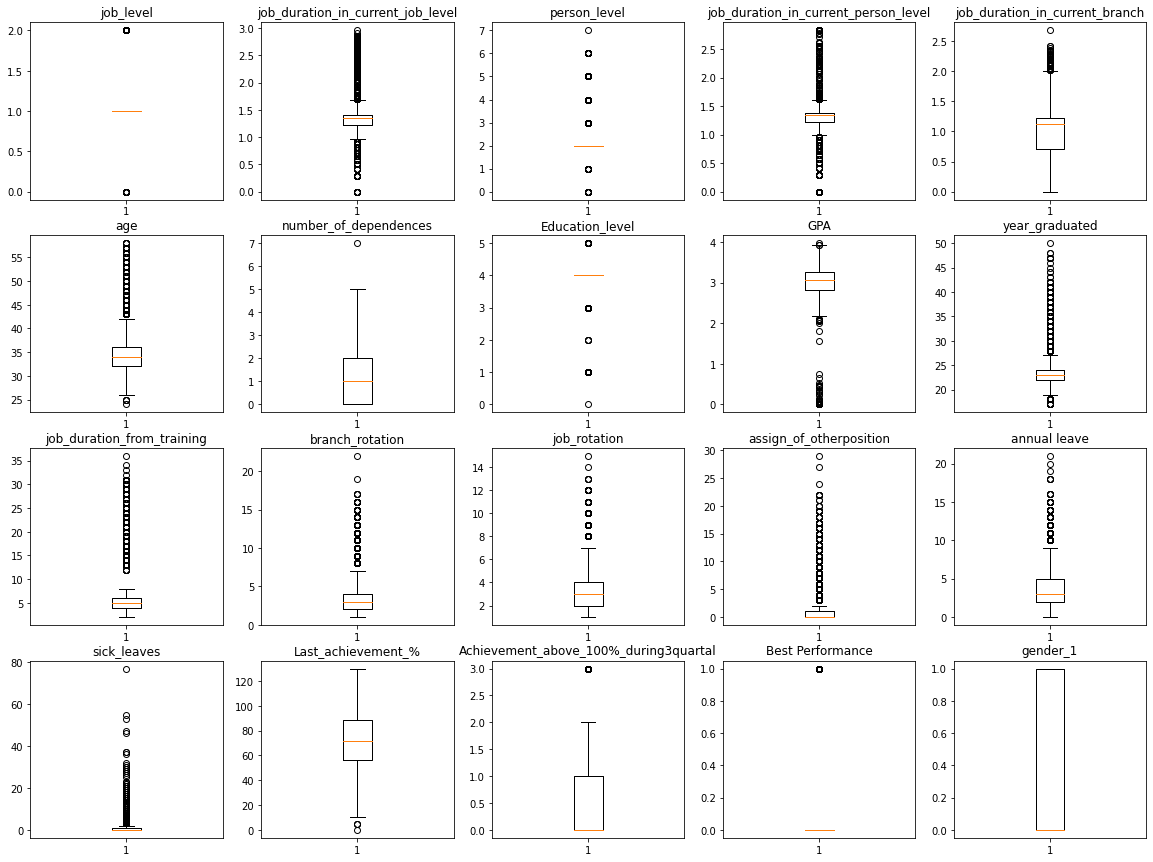

In [68]:
plt.rcParams["figure.figsize"] = [20,15]
fig, axs = plt.subplots(4, 5)
a = 0
for i in range(0,4):
  for j in range(0,5):
    # print(i, j, a)
    axs[i, j].boxplot(train.iloc[:,a])
    axs[i, j].set_title(train.columns[a])
    a = a+1